### xwavelet: an Xarray Front-end for Performing Wavelet Transforms

This package uses the original Python transform code by Torrence and Compo (1998).

In [1]:
%matplotlib inline

import xwavelet as xw
import xarray as xr
import matplotlib.pyplot as plt

Load an xarray timeseries data array of sea surface temperature and generate the area mean time series.

In [2]:
dset = xr.open_mfdataset(
    "noaa.ersst.v5.sst.nc",
    use_cftime=True,
)

# select NINO3 region
sst = dset.sst
sst = sst.sel(lat=slice(-5, 5))
sst = sst.sel(lon=slice(210, 270))

# create area mean
sst = sst.mean(dim=("lat", "lon"))

Use the wavelet analysis with the default settings.  Defaults are for the "Morlet" transform and a starting timescale of 6 months. The result is an Xarray dataset.

In [3]:
result = xw.wavelet(sst)
print(result)

<xarray.Dataset>
Dimensions:             (period: 29, time: 1992)
Coordinates:
  * time                (time) object 1854-01-16 12:00:00 ... 2019-12-16 12:0...
  * period              (period) float64 0.5 0.5946 0.7071 ... 45.25 53.82 64.0
Data variables:
    wavelet             (period, time) complex128 (-0.5899270950178603-0.0532...
    cone_of_influence   (time) float64 6.087e-07 0.0 ... 0.06087 6.087e-07
    timeseries          (time) float64 0.1844 0.8351 1.513 ... -0.4637 -0.4084
    spectrum            (period) float64 0.4528 0.2712 1.297 ... 1.269 1.262
    scaled_ts_variance  (time) float64 0.1825 0.1935 0.2049 ... 0.3319 0.3214
Attributes:
    dt:              0.08333333333333333
    pad:             1
    dj:              0.25
    pow2:            7
    s0:              0.5
    mother:          MORLET
    scaled:          False
    detrend:         True
    frequency_band:  (2, 8)


Plot the time-mean power spectrum

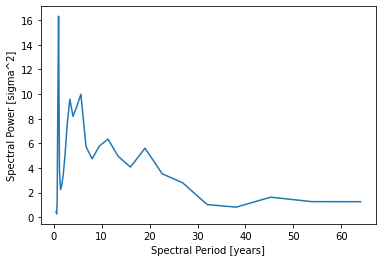

In [4]:
result.spectrum.plot()

### The Wavelet class

This package includes a super-class that both performs the wavelet transform and provides some methods for generating plots

In [5]:
result = xw.Wavelet(sst, scaled=True)
print(result)

In [6]:
print(result.dset)

<xarray.Dataset>
Dimensions:             (period: 29, time: 1992)
Coordinates:
  * time                (time) object 1854-01-16 12:00:00 ... 2019-12-16 12:0...
  * period              (period) float64 0.5 0.5946 0.7071 ... 45.25 53.82 64.0
Data variables:
    wavelet             (period, time) complex128 (-0.2733958120892031-0.0246...
    cone_of_influence   (time) float64 6.087e-07 0.0 ... 0.06087 6.087e-07
    timeseries          (time) float64 0.1844 0.8351 1.513 ... -0.4637 -0.4084
    spectrum            (period) float64 0.09726 0.04898 ... 0.002532 0.002117
    scaled_ts_variance  (time) float64 0.1825 0.1935 0.2049 ... 0.3319 0.3214
Attributes:
    dt:              0.08333333333333333
    pad:             1
    dj:              0.25
    pow2:            7
    s0:              0.5
    mother:          MORLET
    scaled:          True
    detrend:         True
    frequency_band:  (2, 8)


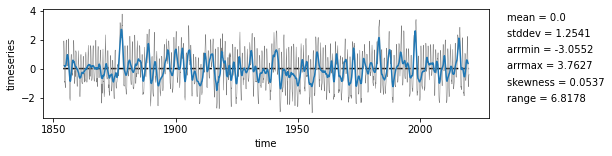

In [7]:
result.timeseries()

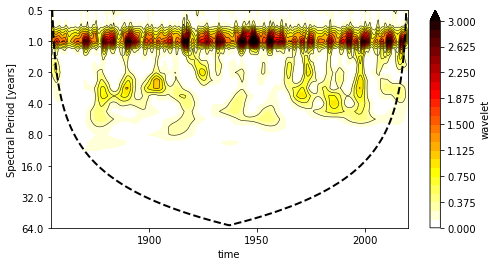

In [8]:
result.density()

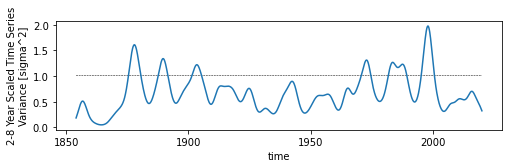

In [9]:
result.variance()

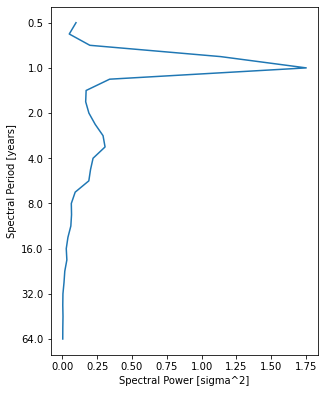

In [10]:
result.spectrum()

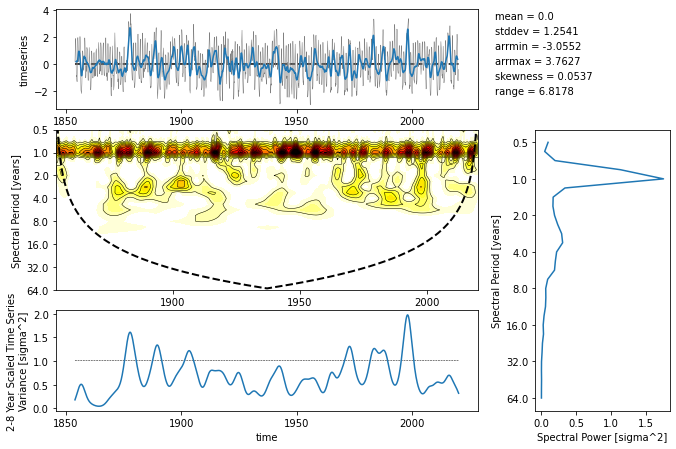

In [11]:
fig = result.composite()